<a href="https://colab.research.google.com/github/NaruShivaKumar/task2_CodingRajaInternship/blob/main/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RMSE: 30.56
MAE: 26.56


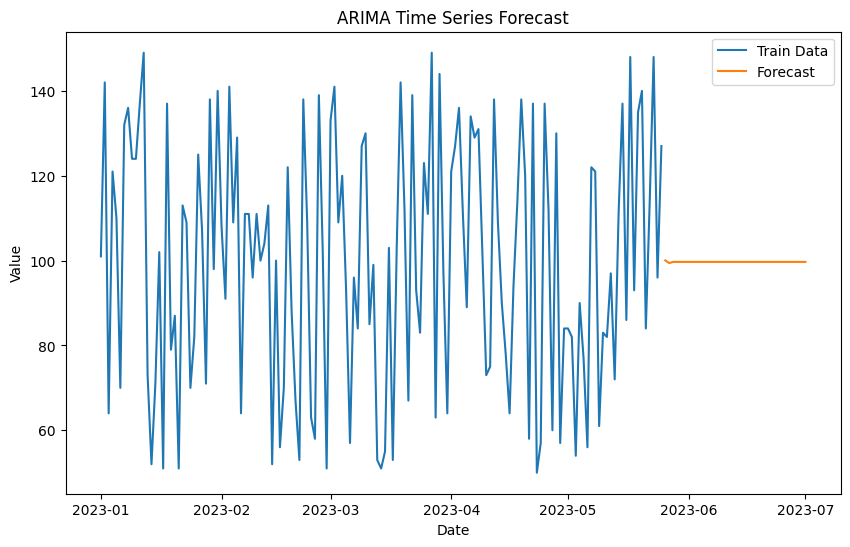

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Generate example time series data
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-07-01', freq='D')
values = np.random.randint(50, 150, size=len(date_rng))
time_series = pd.Series(values, index=date_rng)

# Split data into training and test sets
train_size = int(len(time_series) * 0.8)
train_data, test_data = time_series[:train_size], time_series[train_size:]

# Fit ARIMA model
order = (2, 1, 1)  # ARIMA(p,d,q) order
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Forecast future values
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
mae = mean_absolute_error(test_data, forecast)

# Print evaluation metrics
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()
